In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download("punkt")
from nltk.tokenize  import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [3]:
import tensorflow as tf

In [4]:
#!unzip /content/drive/MyDrive/disney/disney.zip -d /content/drive/MyDrive/disney

In [5]:
data = pd.read_csv("/content/drive/MyDrive/disney/DisneylandReviews.csv",encoding="latin")

<Axes: >

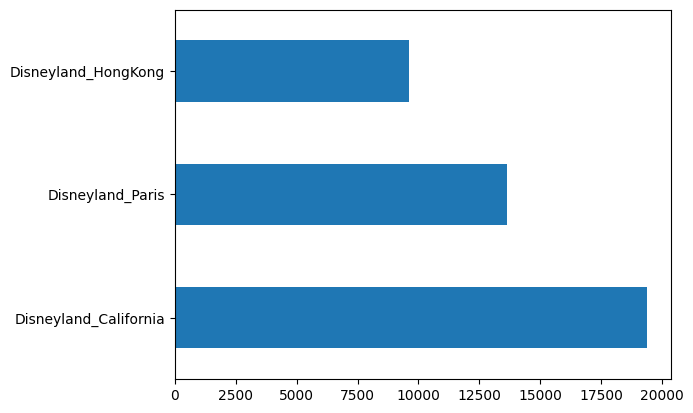

In [6]:
data["Branch"].value_counts().plot(kind = "barh")

<Axes: xlabel='Rating', ylabel='count'>

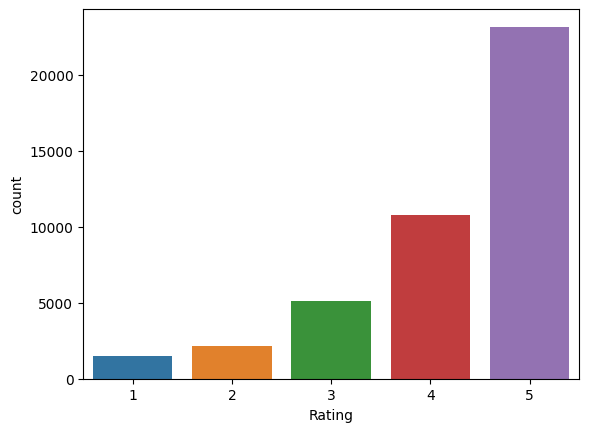

In [7]:
sns.countplot(x = "Rating",data = data)

In [8]:
#for i in data[data["Rating"]==3]["Review_Text"]:
#  print(i)
#  print(" ")

**Map ratings to 3 Sentiments**
*Satisfied--Unsatisfied--Neutral*

In [9]:
def rating(no):
  if no>3:
    return "Satisfied"
  elif no==3:
    return "Neutral"
  elif no<3:
    return "Unsatisfied"

In [10]:
data["Sentiment"] = data["Rating"].apply(lambda x: rating(x))

In [11]:
data2 = data.drop(["Review_ID","Rating","Year_Month","Reviewer_Location","Branch"],axis=1)

In [12]:
data2.head()

,Review_Text,Sentiment
0,If you've ever been to Disneyland anywhere you...,Satisfied
1,Its been a while since d last time we visit HK...,Satisfied
2,Thanks God it wasn t too hot or too humid wh...,Satisfied
3,HK Disneyland is a great compact park. Unfortu...,Satisfied
4,"the location is not in the city, took around 1...",Satisfied


<Axes: >

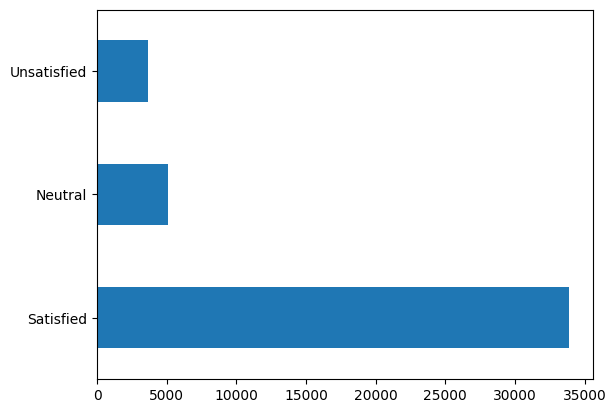

In [13]:
data2["Sentiment"].value_counts().plot(kind= "barh")

In [14]:
import os
dir = '/content/drive/MyDrive/disney/MasterDictionary'

In [15]:
wordsall = []
for file in os.listdir(dir):
  dirs = dir+"/"+file
  f = open(dirs,encoding="ISO-8859-1")
  wordsall.extend(f.read().split("\n"))

In [16]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def tokenizer(func):
  def inner(*args,**kwargs):
    data = kwargs["data"]
    comment_words =""
    for sent in data:
      t = []
      comment_words += " ".join(t)+" "
      for word in word_tokenize(sent):
        if word not in kwargs["stp"]:
          if word in wordsall:
            t.append(word.lower())
      comment_words += " ".join(t)+" "
    return func(data = comment_words,stp=  kwargs["stp"])
  return inner
@tokenizer
def word_cloud(data,stp):
  wordcloud = WordCloud(width = 500, height = 500,background_color = "black",min_font_size= 10).generate(data)
  plt.figure(figsize = (8, 8), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)
  plt.show()

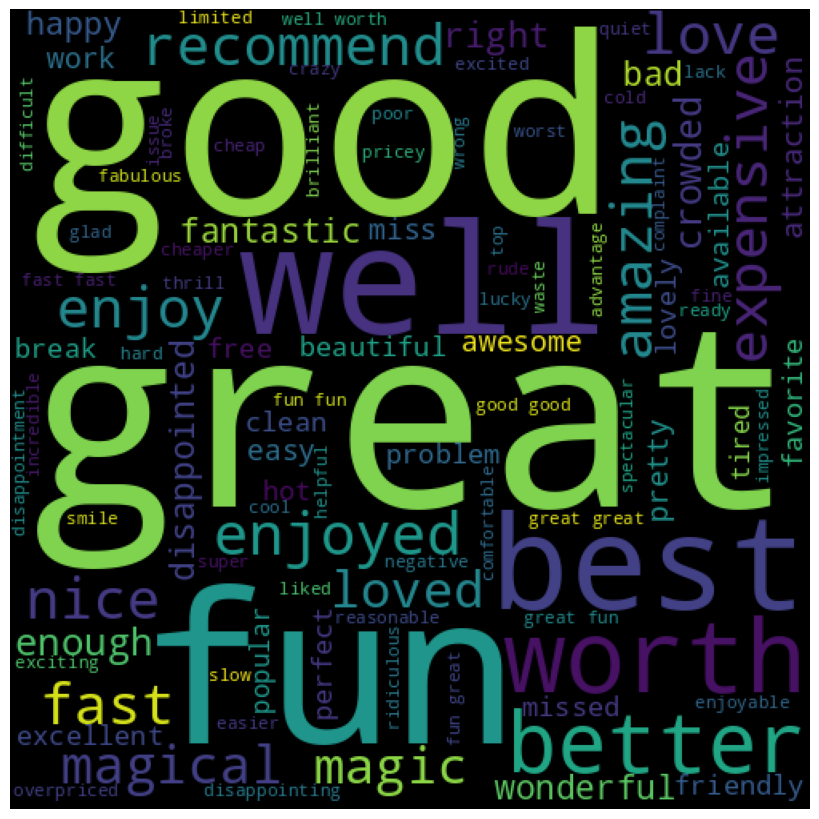

In [17]:
word_cloud(data = data2["Review_Text"] ,stp = stopwords)

Satisfied


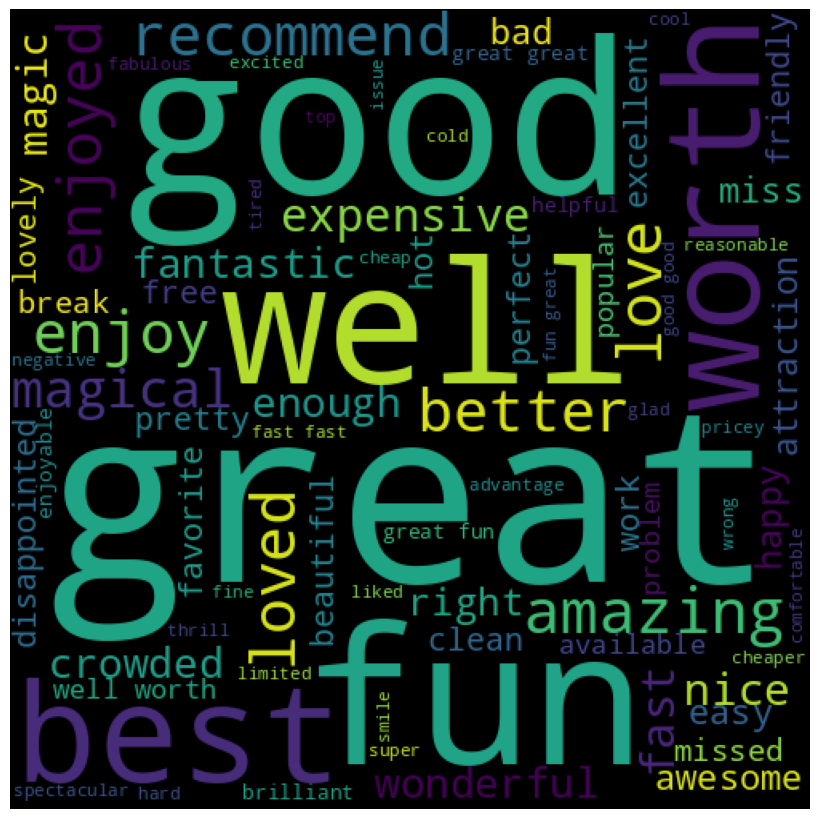

In [18]:
print("Satisfied")
word_cloud(data = data2[data2["Sentiment"]=="Satisfied"]["Review_Text"],stp = stopwords)

neutral


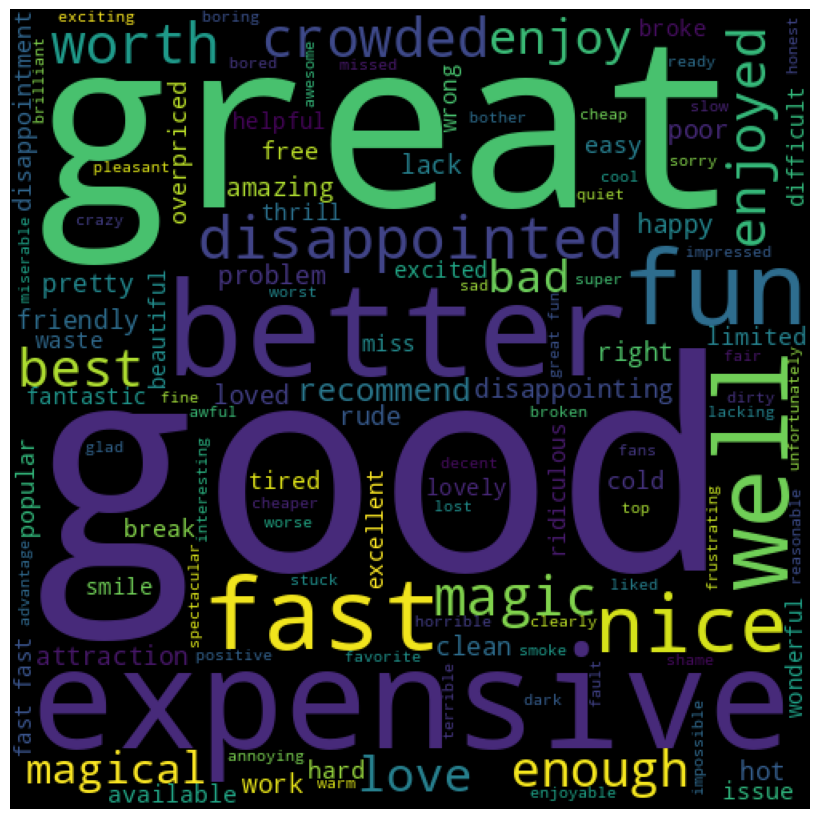

In [19]:
print("neutral")
word_cloud(data = data2[data2["Sentiment"]=="Neutral"]["Review_Text"],stp = stopwords)

unsatisfied


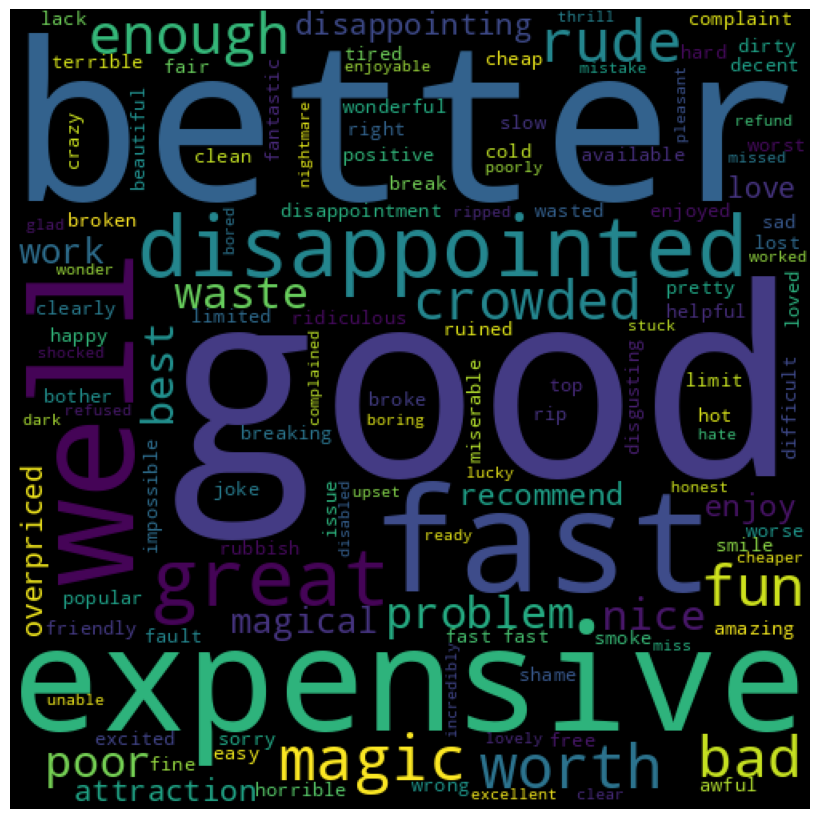

In [20]:
print("unsatisfied")
word_cloud(data = data2[data2["Sentiment"]=="Unsatisfied"]["Review_Text"],stp = stopwords)

In [21]:
word_dic = {}

for file in os.listdir(dir):
  dirs = dir+"/"+file
  f = open(dirs,encoding="ISO-8859-1")
  word_dic[file]= f.read().split("\n")

In [22]:
pos_words = word_dic["positive-words.txt"]
neg_words = word_dic["negative-words.txt"]

In [ ]:
data2["tokenized"] = data2["Review_Text"].apply(lambda x: word_tokenize(x))

In [ ]:
#@tf.function
def pos_neg(sent) :
  pos_score = 0
  neg_score = 0
  #print("oh no")
  for w in sent:
    if w in pos_words:
      pos_score+=1
    elif w in neg_words:
      neg_score+=1
  return pos_score,neg_score

In [ ]:
pos_negatives = data2["tokenized"].apply(lambda x: pos_neg(x))

In [ ]:
pos_score = []
neg_score = []
for i,j in pos_negatives:
  pos_score.append(i)
  neg_score.append(j)

In [ ]:
data2["pos_score"] = pos_score
data2["neg_score"] = neg_score

In [ ]:
data2[data2["Sentiment"]=="Unsatisfied"]

,Review_Text,Sentiment,tokenized,pos_score,neg_score
8,"Feel so let down with this place,the Disneylan...",Unsatisfied,"[Feel, so, let, down, with, this, place, ,, th...",4,4
79,I went to HK Disneyland on 5 April which happe...,Unsatisfied,"[I, went, to, HK, Disneyland, on, 5, April, wh...",2,4
94,Didn t feel the Disney spirit in this place....,Unsatisfied,"[Didn, t, feel, the, Disney, spirit, in, this,...",0,1
101,The main attractions were shut while we still ...,Unsatisfied,"[The, main, attractions, were, shut, while, we...",0,0
123,"Very very small, disappointing all along the l...",Unsatisfied,"[Very, very, small, ,, disappointing, all, alo...",2,4
...,...,...,...,...,...
42639,I will start off by saying that comments aroun...,Unsatisfied,"[I, will, start, off, by, saying, that, commen...",28,25
42640,Disneyland is a great place to spend time with...,Unsatisfied,"[Disneyland, is, a, great, place, to, spend, t...",5,0
42641,This was my first trip to Disneyland and I was...,Unsatisfied,"[This, was, my, first, trip, to, Disneyland, a...",11,9
42643,"The lines are low, thats good, the staff are r...",Unsatisfied,"[The, lines, are, low, ,, thats, good, ,, the,...",7,6


In [ ]:
data2["polarity score"] = (data2["pos_score"] - data2["neg_score"])/((data2["pos_score"]+data2["neg_score"])+0.0000001)

<Axes: ylabel='Density'>

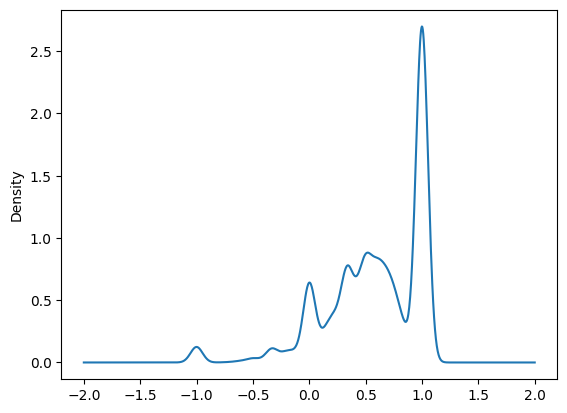

In [ ]:
data2[data2["Sentiment"]=="Satisfied"]["polarity score"].plot(kind="kde")

<Axes: ylabel='Density'>

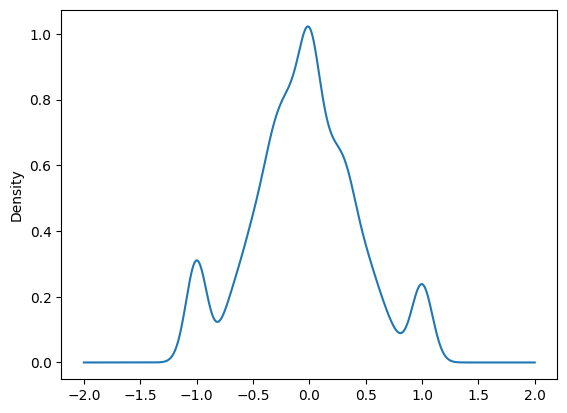

In [ ]:
data2[data2["Sentiment"]=="Unsatisfied"]["polarity score"].plot(kind="kde")

<Axes: ylabel='Density'>

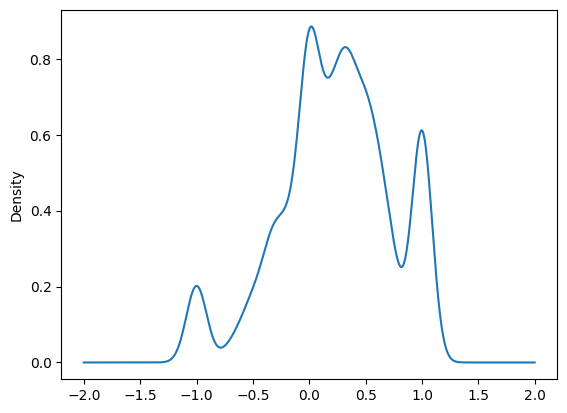

In [ ]:
data2[data2["Sentiment"]=="Neutral"]["polarity score"].plot(kind="kde")

<Axes: xlabel='pos_score', ylabel='polarity score'>

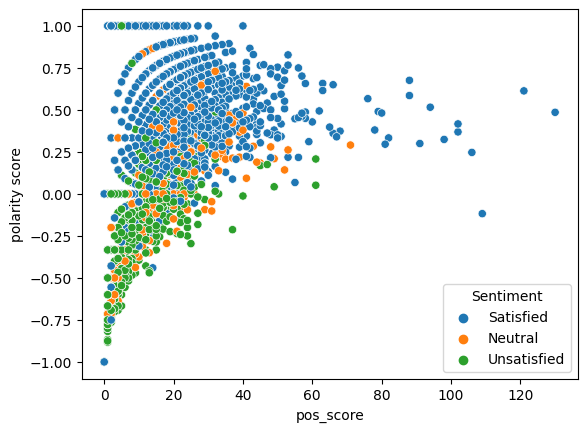

In [ ]:
sns.scatterplot(x = "pos_score",y = "polarity score",data =data2,hue = "Sentiment")

In [ ]:
data2.to_csv("/content/drive/MyDrive/disney/data2.csv")

In [ ]:
data2 = pd.read_csv("/content/drive/MyDrive/disney/data2.csv")

In [ ]:
data2

,Unnamed: 0,Review_Text,Sentiment,tokenized,pos_score,neg_score,polarity score
0,0,If you've ever been to Disneyland anywhere you...,Satisfied,"['If', 'you', ""'ve"", 'ever', 'been', 'to', 'Di...",6,0,1.000000
1,1,Its been a while since d last time we visit HK...,Satisfied,"['Its', 'been', 'a', 'while', 'since', 'd', 'l...",5,1,0.666667
2,2,Thanks God it wasn t too hot or too humid wh...,Satisfied,"['Thanks', 'God', 'it', 'wasn', 't', 'too', 'h...",7,4,0.272727
3,3,HK Disneyland is a great compact park. Unfortu...,Satisfied,"['HK', 'Disneyland', 'is', 'a', 'great', 'comp...",6,1,0.714286
4,4,"the location is not in the city, took around 1...",Satisfied,"['the', 'location', 'is', 'not', 'in', 'the', ...",3,1,0.500000
...,...,...,...,...,...,...,...
42651,42651,i went to disneyland paris in july 03 and thou...,Satisfied,"['i', 'went', 'to', 'disneyland', 'paris', 'in...",9,2,0.636364
42652,42652,2 adults and 1 child of 11 visited Disneyland ...,Satisfied,"['2', 'adults', 'and', '1', 'child', 'of', '11...",11,2,0.692308
42653,42653,My eleven year old daughter and myself went to...,Satisfied,"['My', 'eleven', 'year', 'old', 'daughter', 'a...",2,0,1.000000
42654,42654,"This hotel, part of the Disneyland Paris compl...",Satisfied,"['This', 'hotel', ',', 'part', 'of', 'the', 'D...",6,3,0.333333


In [ ]:
txt = data2["Review_Text"][0]

In [ ]:
from textblob import TextBlob

In [ ]:
TextBlob(txt).sentiment.polarity

0.24398148148148147

In [ ]:
data2["text_polarity_score"] = data2["Review_Text"].apply(lambda x: TextBlob(x).sentiment.polarity)

<Axes: ylabel='Density'>

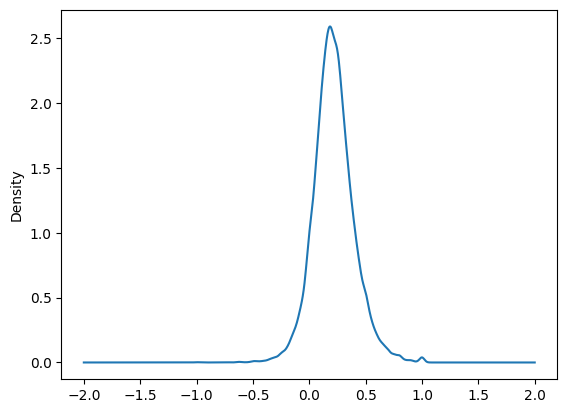

In [ ]:
data2["text_polarity_score"].plot(kind = "kde")

<Axes: >

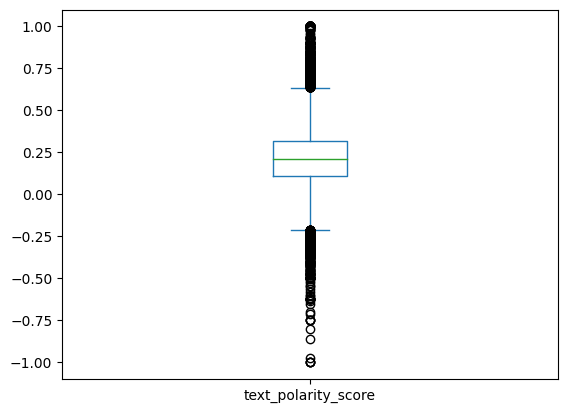

In [ ]:
data2["text_polarity_score"].plot(kind = "box")

<Axes: >

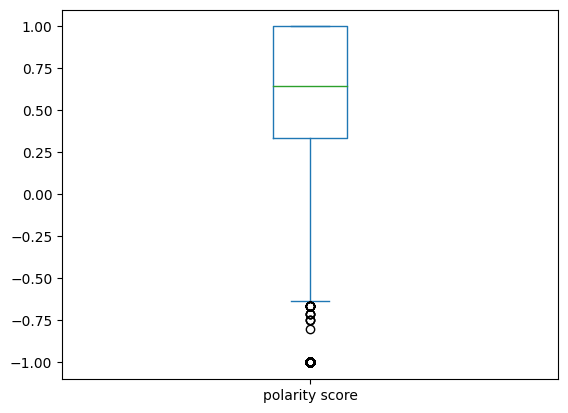

In [ ]:
data2[data2["Sentiment"]=="Satisfied"]["polarity score"].plot(kind="box")

<Axes: >

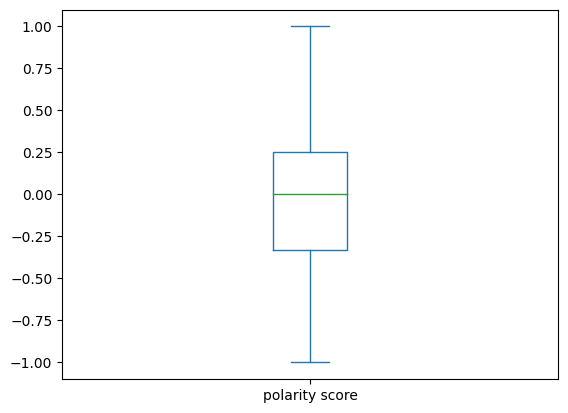

In [ ]:
data2[data2["Sentiment"]=="Unsatisfied"]["polarity score"].plot(kind="box")

<Axes: >

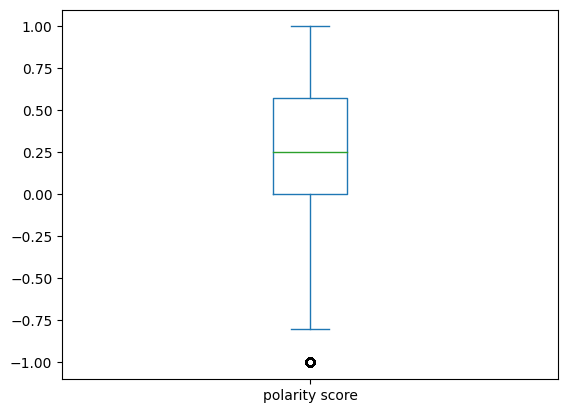

In [ ]:
data2[data2["Sentiment"]=="Neutral"]["polarity score"].plot(kind="box")